# Lab 4 - The Discrete Fourier Transform


Team Members:Logan Aikas, Kate Sullivan, Victor Li

In [56]:
import numpy as np
import math
from math import *
import matplotlib
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift

## 1) Complex Numbers and Complex Sinusoids

In [70]:
# writing the complex number as real + imaginary
z1 = 4+3j

# using the function complex
z2 =  complex(4, 3)  
z3 = complex("4+3j")
print(z1)
print(z2)
print(z3)

# add the real part of 4+3j and the imaginary part of 
# 5+7j and display the result
print(4 + 7j)

# subtract the imaginary part of 4+3j from the real part of
# 5+7j and display the result
print(5 - 3j)

# multiply 4+3j and 4-3j and dislay the result
print((4+3j)*(4-3j))

# divide 7+5j and 7-5j and display the result
print((7+5j)/(7-5j))

(4+3j)
(4+3j)
(4+3j)
(4+7j)
(5-3j)
(25+0j)
(0.3243243243243243+0.9459459459459459j)


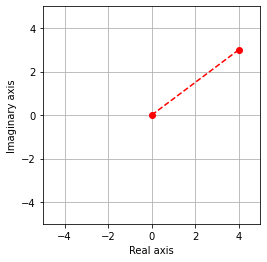

In [71]:
# define a complex number
z = 4+3j

# obtain the real and imaginary parts of the complex number
real = np.real(z)
imaginary = np.imag(z)

# plot the complex number on the complex plane
plt.plot((0,real),(0,imaginary),'ro--')

# some plotting touch-ups
plt.axis('square')
plt.axis([-5, 5, -5, 5])
plt.grid(True)
plt.xlabel('Real axis'), plt.ylabel('Imaginary axis')
plt.show()

In [72]:
# compute the magnitude of the complex number using 
# Pythagorean theorem
mag1 = np.sqrt(real**2 + imaginary**2)
# or using np.abs()
mag2 = np.abs(z)
# print out the magnitude of the complex number
print( 'The magnitude is',mag1,'or',mag2 )

# compute the angle of the complex number using trigonometry (np.arctan())
phs1 = np.arctan(imaginary/real)
# or using the np.angle function
phs2 = np.angle(z)
# print out the phase of the complex number
print( 'The angle is', phs2,'or',phs1 )

The magnitude is 5.0 or 5.0
The angle is 0.6435011087932844 or 0.6435011087932844


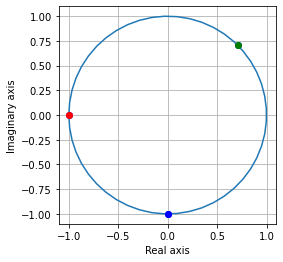

In [73]:
# define k (an angle, or possibly a list of angles)
k = [np.pi/4, -np.pi/2, np.pi]

# Define the complex exponential here using Euler's formula
# (possibly with a lambda expression)



euler = lambda k: np.exp([kval*complex(0, 1) for kval in k])

# plot dot
# if k is a single angle:
plt.plot(np.real(euler(k)),np.imag(euler(k)),'bo')



unit_circle = np.linspace(-np.pi, np.pi)

plt.plot(np.real(euler(unit_circle)),np.imag(euler(unit_circle)))


count = 0
for kval in euler(k):
    if(count == 0):
        plt.plot(np.real(kval),np.imag(kval),'go')
        count = 1
    elif(count == 1):
        plt.plot(np.real(kval),np.imag(kval),'bo')
        count = 2
    else:
        plt.plot(np.real(kval),np.imag(kval),'ro')
        count = 0

# if k is a list of angles:
# plt.plot(np.real(euler(k[0])),np.imag(euler(k[0])),'go')
# plt.plot(np.real(euler(k[1])),np.imag(euler(k[1])),'ro')
# etc

# draw unit circle for reference

# some plotting touch-ups
plt.axis('square')
plt.grid(True)
plt.xlabel('Real axis'), plt.ylabel('Imaginary axis')
plt.show()

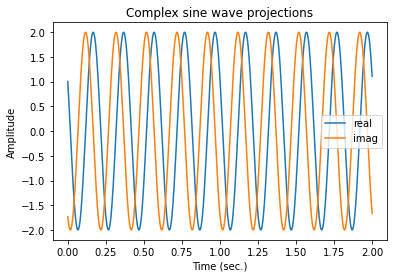

In [74]:
# complex sine waves

# general simulation parameters
srate =  500# sampling rate in Hz
time  =  np.arange(0, 2, 1/srate)# time array in seconds

# sine wave parameters
freq =     5# frequency in Hz
ampl =     2# amplitude in a.u.
phase =  np.pi/3# phase in radians

# generate the sine wave
csw = ampl*euler(-2*np.pi*freq*time - phase)


# plot the results
plt.plot(time,np.real(csw),label='real')
plt.plot(time,np.imag(csw),label='imag')
plt.xlabel('Time (sec.)'), plt.ylabel('Amplitude')
plt.title('Complex sine wave projections')
plt.legend()
plt.show()

[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375]


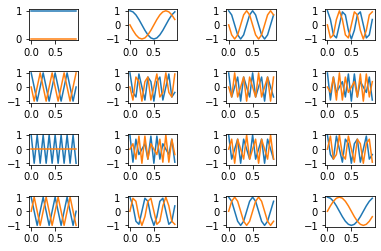

[1.-2.4492936e-16j]


In [75]:
points = 16 # number of time points , sometimes denoted by N.... shouldn't this be frequency? Not period... so not N

# time vector to plot the basis
FourierTime = np.array(range(0,points))/points 


#IT'S BECAUSE WE ARE USING A DISCRETE TIME VECTOR THAT THE COS AND SIN'S LOOK THE SAME
#THAT IS THE ONLY REASON THAT HAPPENS

print(FourierTime)


for fi in range(points):
    # create complex sine wave
    csw = euler(-2*np.pi*fi*FourierTime)
    
    

        
    # and plot it
    loc = np.unravel_index(fi,[4, 4],'F')
    plt.subplot2grid((4,4),(loc[1],loc[0]))
    plt.subplots_adjust(hspace=1, wspace=1, left = 0.1)
    
    plt.plot(FourierTime,np.real(csw), label = "real")
    plt.plot(FourierTime,np.imag(csw), label = "imag")
#     plt.title(str(fi))
#     plt.tight_layout()

plt.show()


euler_1half = euler([np.pi/(1/2)])
print(euler_1half)

## Discussion

#### When you print the Fourier basis for your N point DFT (as in Figure 4), how many unique frequencies are displayed in the plot? (Ignore the phase shifts)

There are a total of 9 unique frequencies. It can be seen that after N = 8 the frequencies start repeating if you ignore the phase shift. Therefore for N = 0 through N = 8 the frequencies are unique and after that they begin repeating (ignoring the phase shift).


#### If the number of unique frequencies does not equal the number of points, then why is that the case despite your code that creates complex sinusoids of frequencies from 0 to N-1.

This is because the frequencies begin to alias past the nyquist frequency and it turn become phase shifted frequencies of the first N/2 frequencies. Because we are in discrete time, using discrete time vectors, the unique frequencies will depend on the sampling rate. For any sampling rate there is a Nyquist frequency, past this frequency although the frequency numbers are larger, do the nature of discrete complex exponentials, anything past the Nyquist frequency will be a negative frequency of the first N = 0 to Nyquist frequencies.

This can be visualized through additional figures:

<img src="https://drive.google.com/uc?export=view&id=1u0AYbXhEfN4d73j5Dv5avrsjIOWSsF8Z" style="width: 500px; max-width: 100%; height: auto" />

<img src="https://drive.google.com/uc?export=view&id=1ttHbyJ4FxyCqjfyYHVaAL6LSa-8jUvPe" style="width: 500px; max-width: 100%; height: auto"  />

<img src="https://drive.google.com/uc?export=view&id=1rAwzjYieBjvjp55Yix9X5DiIIMuRP22E" style="width: 500px; max-width: 100%; height: auto" />

<img src="https://drive.google.com/uc?export=view&id=17lsgzndJu55O_1P1GqqvZhrwF4g9mWr_" style="width: 500px; max-width: 100%; height: auto" />

<img src="https://drive.google.com/uc?export=view&id=1VTHDOsJdB5G5NCEbazQCniIr2WVebtmf" style="width: 500px; max-width: 100%; height: auto"  />

<img src="https://drive.google.com/uc?export=view&id=1zBGz-3X3KxiXE0xInGspU59h9bvHOhra" style="width: 500px; max-width: 100%; height: auto"  />


For k = 1, and k = 15 the discrete points on the unit circle are identical. Similarly for k = 4 and k = 12 the unit circles have identical points. For the Nyquist frequency and for the DC component the circle values are unique. Therefore frequencies from k = 0 through Nyquist will be unique (assuming we ignore phase shift).


## 2) Naive Computation of the DFT and IDFT from First Principles (Vector Form)

4000 len(time1)
4000 len(signal1)
total points 1 =  4000


<ipython-input-76-0c73dbdd494e>:69: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(hz1,ampls1[range(0,len(hz1))])
<ipython-input-76-0c73dbdd494e>:74: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(hz2,ampls2[0:len(hz2)])


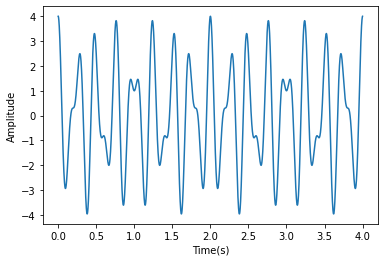

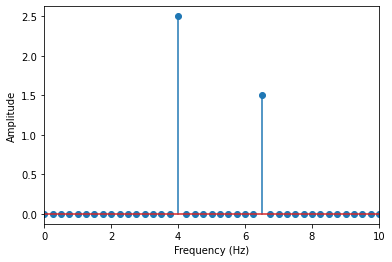

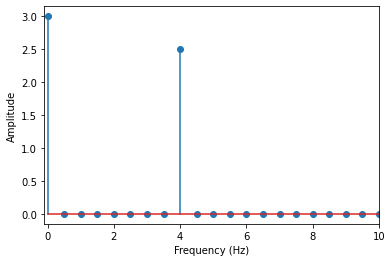

In [76]:
## The DFT in loop-form


# create the signal 1
srate1  = 1000 # hz
time1   = np.arange(0,4, 1/srate1) # time vector in seconds
pnts1   = len(time1)# number of time points (1000 samples per second * 4 seconds)
signal1 = 2.5*np.cos(2*np.pi*4*time1) + 1.5*np.cos(2*np.pi*6.5*time1)

fig109 = plt.figure(109)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.plot(time1, signal1)


print(len(time1), "len(time1)") # <--- 4000 samples

print(len(signal1), "len(signal1)") # <--- 4000 samples


print("total points 1 = ", pnts1)

# create the signal 2
srate2  = 1000# hz
time2  =  np.arange(0,2,1/srate2)# time vector in seconds
pnts2   =  len(time2)# number of time points
signal2 = 2.5*np.cos(2*np.pi*4*time2) + 1.5

# prepare the Fourier transform for signal 1
fourTime1 = np.array(range(0,pnts1))/pnts1
fCoefs1  = np.zeros((len(signal1)),dtype=complex) 

# prepare the Fourier transform for signal 2
fourTime2 = np.array(range(0,pnts2))/pnts2
fCoefs2   = np.zeros(len(signal2),dtype=complex)

# DFT for signal 2
for fi in range(0,pnts1):
    
    # create complex sine wave
    csw1 = np.exp( (-1j*2*np.pi*fourTime1*fi))
    
    # compute dot product between sine wave and signal
    # these are called the Fourier coefficients
    fCoefs1[fi] = (1/pnts1)*np.sum(csw1*signal1)
    
# DFT for signal 2
for fi in range(0,pnts2):
    # create complex sine wave and compute dot product with signal
    csw2 = np.exp( (-1j*2*np.pi*fourTime2*fi))
    
    fCoefs2[fi] = (1/pnts2)*np.sum(csw2*signal2)


# extract amplitudes for the spectrum of signal 1
ampls1 = 2*np.abs(fCoefs1)

# extract amplitudes for the spectrum of signal 2
ampls2 = 2*np.abs(fCoefs2);


# compute frequencies vector for the spectrum of signal 1
hz1 = np.linspace(0,srate1/2,num=math.floor(pnts1/2.)+1)

# compute frequencies vector for the spectrum of signal 2
hz2 = np.linspace(0,srate2/2,num=math.floor(pnts2/2.)+1)

fig1 = plt.figure(1)
plt.stem(hz1,ampls1[range(0,len(hz1))])
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude')
plt.xlim(0,10)

fig2 = plt.figure(2)
plt.stem(hz2,ampls2[0:len(hz2)])
plt.xlim(-.1,10)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude')
plt.show()

Text(0.5, 1.0, 'Comparison between original and reconstructed Signal 2')

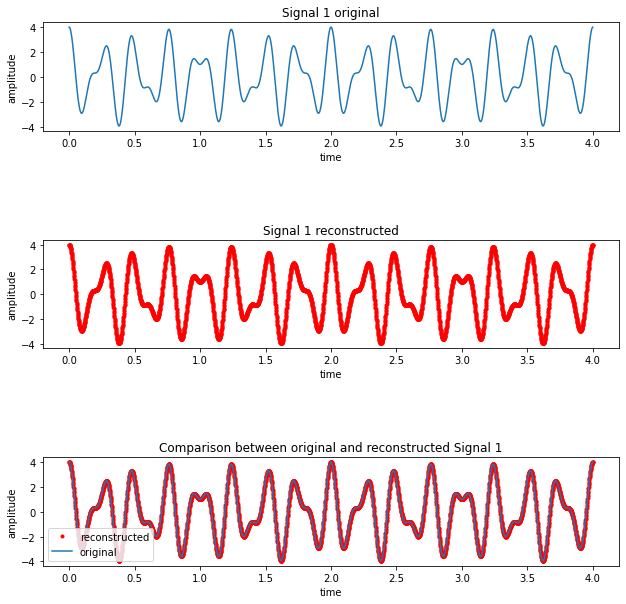

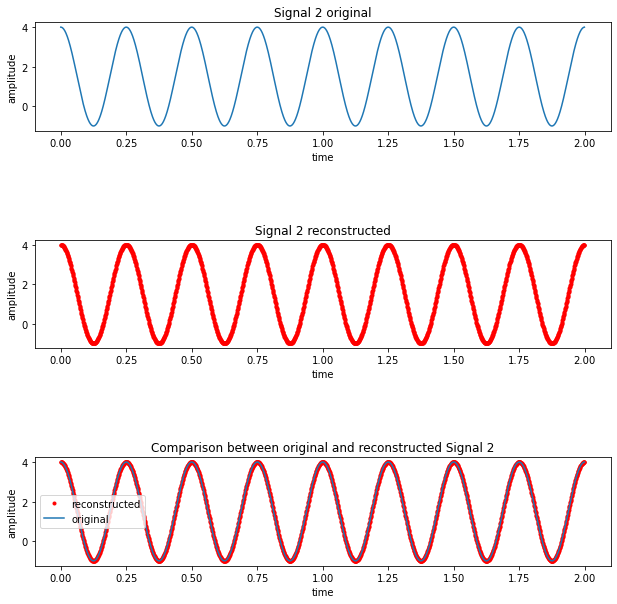

In [77]:

# initialize time-domain reconstruction for signal 1
reconSignal1 = np.zeros(len(signal1))
# initialize time-domain reconstruction for signal 2
reconSignal2 = np.zeros(len(signal2))

for fi in range(0,pnts1):
    
    # create coefficient-modulated complex sine wave
    
    #here we are adding every sin wave at the specific fourier coefficient
    #we are adding all the sin waves together that make up the signal 
    #fourtime1 makes sure we match the length of the signal for each 
    #iteration
    inv_csw1 = fCoefs1[fi]*np.exp(1j*2*np.pi*fourTime1*fi)
    
    # sum them together
    reconSignal1 = reconSignal1 + inv_csw1
    
for fi in range(0,pnts2):
    
    # create coefficient-modulated complex sine wave
    inv_csw2 = fCoefs2[fi]*np.exp(1j*2*np.pi*fourTime2*fi)
    
    # sum them together
    reconSignal2 = reconSignal2 + inv_csw2

#plot the results for signal 1
fig3 = plt.figure(3,figsize=(10,10))
fig3.subplots_adjust(hspace=1, wspace=1, left = 0.1)

plt.subplot(3,1,1)    
plt.plot(time1,signal1,label='original')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Signal 1 original')

plt.subplot(3,1,2)
plt.plot(time1,np.real(reconSignal1),'r.',label='reconstructed')    
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Signal 1 reconstructed')

plt.subplot(3,1,3)
plt.plot(time1,np.real(reconSignal1),'r.',label='reconstructed')    
plt.plot(time1,signal1,label='original')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Comparison between original and reconstructed Signal 1')
plt.legend()
 
#plot the results for signal 2
fig4 = plt.figure(4,figsize=(10,10))
fig4.subplots_adjust(hspace=1, wspace=1, left = 0.1)

plt.subplot(3,1,1)
plt.plot(time2,signal2,label='original')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Signal 2 original')

plt.subplot(3,1,2)
plt.plot(time2,np.real(reconSignal2),'r.',label='reconstructed')    
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Signal 2 reconstructed')

plt.subplot(3,1,3)
plt.plot(time2,np.real(reconSignal2),'r.',label='reconstructed')    
plt.plot(time2,signal2,label='original')
plt.legend()
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Comparison between original and reconstructed Signal 2')


## Discussion


#### Let’s say you wanted shift the level of a regular sinusoid of a given frequency that oscillates in amplitude from -1 to 1 so that it oscillates from 0 to 2 instead. How would you manipulate it’s magnitude spectrum (given by your code) to do this?

In the time domain adding 1 to a sinusoid will increase the overall ampltude by 1. Since adding 1 to the DC component (eg the a0 Fourier Coefficient) would achieve this, we could simply set the coefficient at index 0 corresponding to frequency 0 to be 1 higher than its current value.


## 3) Naive Computation of the DFT and IDFT from First Principles (Matrix Form)

In [90]:
def dft_matrix(N):
    # create a 1xN matrix containing indices 0 to N-1
    omega = 1.0*e**(-2j*pi/N)
    a = np.expand_dims(np.arange(0, N),0)
    a_T = np.transpose(a)
    a_Ta= a_T*a
    W = omega**a_Ta

    return W




In [91]:


def dft(signal,N):
    
    # Obtain DFT matrix for signal 
    W = dft_matrix(N)
    # Find the DFT for signal
    X = np.matmul(W,signal)/N
    # return the DFT
    
    return X

In [92]:
def dft_shift(X):
    N = int(len(X))
#     print(N)
    if (N%2 == 0):
        # even-length: return N+1 values
        
        # specify the range of frequency bins in the DFT
        n = np.arange(-N/2, (N/2)+1, 1)
        # create the shifted spectrum
        Y = np.concatenate((X[int(N/2):N+1], X[0:int(N/2)+1]))
        return n,Y
    else:
        # odd-length: return N values
        
        # specify the range of frequency bins in the DFT
        
       
        
        n = np.arange(-(N-1)/2, ((N-1)/2)+1, 1)

        Y = np.concatenate((X[int(((N-1)/2)+1):N], X[0:int(((N-1)/2))+1]))
        
       
        
        return n,Y
    
    
my_X = np.arange(0, 10, 1)



n, y = dft_shift(my_X)


<ipython-input-93-d34ea0904c05>:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(2*abs(X));
<ipython-input-93-d34ea0904c05>:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, 2*abs(y));


Text(0.5, 1.0, 'Shifted Spectrum')

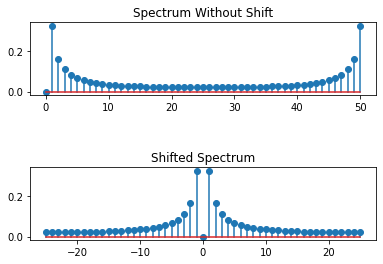

In [93]:
# test your shift function here

x = np.arange(0, 1.02, 0.02) - 0.5 # test signal




X = dft(x,len(x)) # obtain DFT of the test signal



fig_test=plt.figure(100)
fig_test.subplots_adjust(hspace=1, wspace=1, left = 0.1)
# plot the spectrum without shift
plt.subplot(2,1,1)
plt.stem(2*abs(X));
plt.title('Spectrum Without Shift')

n, y = dft_shift(X) # obtain shifted spectrum
# plot the shifted spectrum
plt.subplot(2,1,2)
plt.stem(n, 2*abs(y));
plt.title('Shifted Spectrum')

In [94]:
def dft_map(X, Fs, shift):
    
    
#     print(len(X), "length of X")
    # define the resolution
    resolution =  Fs/len(X)
    
    if shift:
        # apply a shift if the condition is True
        
        # get both the frequency bins and the shifted spectrum
        n, Y =  dft_shift(X)
    else:
        Y =  X# retain the original spectrum for no shift
        
        # the range of frequency bins is from 0 to 
        # the length of the signal for no shift
        n = np.arange(0, len(Y))*(1/resolution)
        
    f =  n*resolution# obtain frequency vector
    
    return f, Y

<ipython-input-95-26fca941b5b4>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(fz1,absX1);
<ipython-input-95-26fca941b5b4>:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(fz2,absX2)


Text(0.5, 1.0, 'Spectrum of Signal 2')

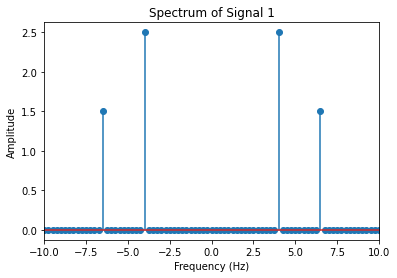

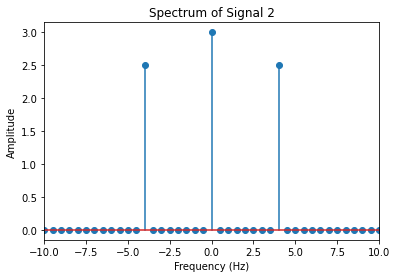

In [95]:
# Find the DFT for signal 1 and map to true frequencies
fz1, X1 = dft_map(dft(signal1, len(signal1)), srate1, True)
# obtain absolute value
absX1 = 2*abs(X1)

# plot the result
fig4 = plt.figure(4)
plt.stem(fz1,absX1);
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude')
plt.xlim(-10,10);
plt.title('Spectrum of Signal 1')

# Find the DFT for signal 2 and map to true frequencies
fz2, X2 = dft_map(dft(signal2, len(signal2)), srate2, True)
# obtain absolute value
absX2 = 2*abs(X2)
# plot the result
fig5 = plt.figure(5)
plt.stem(fz2,absX2)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude')
plt.xlim(-10,10);
plt.title('Spectrum of Signal 2')


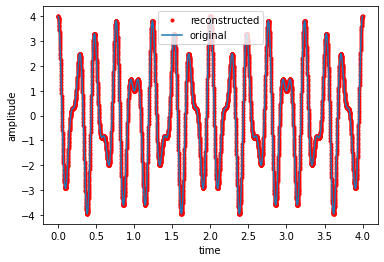

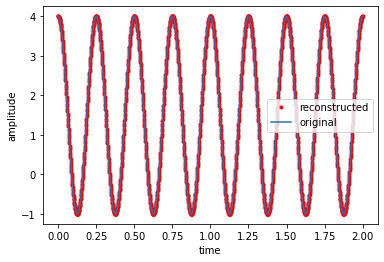

In [96]:


W1 = dft_matrix(len(signal1)).T.conjugate()
x_hat1 = np.matmul(W1, dft(signal1, len(signal1)))
fig6 = plt.figure(6)
plt.plot(time1,np.real(x_hat1),'r.',label='reconstructed')    
plt.plot(time1,signal1,label='original')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend()

W2 = dft_matrix(len(signal2)).T.conjugate()
x_hat2 = np.matmul(W2, dft(signal2, len(signal2)))

fig7 = plt.figure(7)
plt.plot(time2,np.real(x_hat2),'r.',label='reconstructed')    
plt.plot(time2,signal2,label='original')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend()


## Discussion

#### Notice that the fft functions of numpy and scipy do not have a shift in the spectrum by default and neither does your dft function. When or why would you want to work with a spectrum that is not shifted, or when may a shifted spectrum be unnecessary?

For real signals since the real part of the DFT is even symmetric and since the imaginary part is odd symmetric you only really need half the values. So you could discard half of the result storing half the data and then use even and odd properties for any calculations. Frequency detection is one case where you might not need to work with a shifted spectrum. You can only check the maximum frequency (which is half of the sampling rate) and anything beneath it. In this case you don't need to check negative frequencies and therefore only need half of the frequency spectrum.
 

#### Notice that numpy and scipy have provision to find the N point DFT of a signal when N is greater than the length of the signal but your dft function breaks down if N is not the length of the signal. What can you do to circumvent this problem?

If N is only slightly larger than the length of your signal, then one option is to zero pad the signal. For instance if N is 1010 and your signal is 1000 long, then adding 10 zeros is likely an ok method to avoid this. However if N = 10000 and your signal has length 1000, you could make your signal periodic, eg, 10 periods, to make sure it is long enough as N. There are likely other techniques as well such as a mixture of zero padding and adding periods of the signal, or even using linear interpolation to expand the signal. These are all possible methods to circumvent this problem, though we are not sure which is the best.

#### You’ve learned about CTFT (Continuous Time Fourier Transforms), DTFT(Discrete Time Fourier Transform), DFT and FFT. What is the relationship between these transforms? How are they different from each other and in what ways are they similar? Do this comparison for each one against the rest.

All of the above transforms share the same goal which is to transform a signal from the time domain to the frequency domain so that we can see the spectrum of frequencies present in that signal. In the case of the CTFT we are providing a continuous time signal, and output a continuum of frequency values that is infinite. Similarly for the DTFT we also get a continuum in in the frequency domain, however unlike the CTFT the input is a discrete time function. The DFT takes a discrete time input and outputs a discrete frequency sequence that is finite in length, and has a maximum frequency corresponding to half of the sampling rate. The FFT is simply a faster implementation of the DFT that also has a discrete input and output. The CTFT, and DTFT can only be calculated theoretically since a computer cannot store infinite values, whereas the DFT can be stored on a computer since it outputs a finite length frequency response. 



## 4) Minimizing Energy Spread and Zero Padding

In [97]:
def minimizeEnergySpreadDFT(x, fs, f1, f2):
    
    """ 
    Inputs:
    x : signal
    fs : sampling rate
    f1 : frequency of one of the sinusoids
    f2 : frequency of the other sinusoid
    
    Outputs:
    mX : the spectrum of x (with shift if needed) with minimum
    spectral leakage  
    f: the corresponding frequency vector
    """
    
    


    t1 =  fs/f1# period (in terms of samples) of first sinusoidal component
    t2 =  fs/f2# period (in terms of samples) of second sinusoidal component
    M =   int((int(int(t1)*int(t2) ))/(int(math.gcd(int(t1), int(t2) )) ))# LCM of the two periods

    X = dft(x[0:M], M) # M point DFT of the signal
    
    # obtain the frequency mapping and shifted spectrum
    f,mX =  dft_map(X, fs, True)
    
    return mX,f



<ipython-input-98-618ef40f2a8d>:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(f,2*abs(mX))
<ipython-input-98-618ef40f2a8d>:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freqs,2*abs(mX))


Text(0.5, 1.0, 'With Minimization of Spectral Leakage')

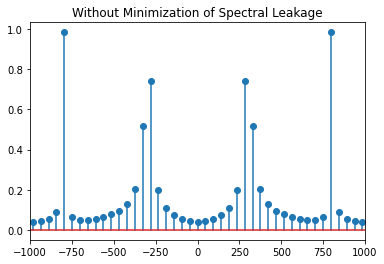

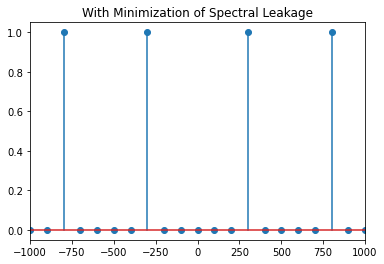

In [98]:
#Define the sampling rate and the signal
fs = 48000
f1 = 300
f2 = 800
epsilon = 1/(2*fs)
end_time = 2
t = np.arange(0,end_time+epsilon,1/fs)
x = np.cos(2*np.pi*f1*t) + np.cos(2*np.pi*f2*t)

# Plot DFT before minimizing the energy spread or spectral
# leakage for comparison
X = dft(x[:1024], 1024)
f,mX = dft_map(X,fs,True)
fig12 = plt.figure(12)
plt.stem(f,2*abs(mX))
plt.xlim(-1000,1000)
plt.title('Without Minimization of Spectral Leakage')

# Plot the DFT after minimizing the energy spread or spectral
# leakage
mX,freqs = minimizeEnergySpreadDFT(x[:1024], fs, f1, f2)
fig13 = plt.figure(13)
plt.stem(freqs,2*abs(mX))
plt.xlim(-1000,1000)
plt.title('With Minimization of Spectral Leakage')


In [100]:
def optimalZeropad(x, fs, f):
  
    M =  len(x)# store the length of the signal
    
    # calculate the number of zeros to be padded
    period_samples = fs/f # sinusoid period, in samples
    periods_in_sig = M/period_samples# length of signal, in periods
    
    
   
    
    periods_in_pad = math.ceil(periods_in_sig) - periods_in_sig # length that we need to pad, in periods
    
  
    pad = math.ceil(periods_in_pad*period_samples) # length that we need to pad, in samples
    
  
    N = M + pad  # find the length of the signal after zero padding
    
   
    
    x = np.concatenate((x, np.zeros(pad))) # pad the signal with zeros
    
  
    
    X = dft(x, N)  # obtain the DFT of the zero padded signal
    
#     # obtain the frequency mapping and shifted spectrum
    f,mX = dft_map(X, fs, True)  
    
    return mX,f


signal = np.arange(0, 25, 1)
fs = 1000
f = 100

# optimalZeropad(signal, fs, f)

<ipython-input-101-43ce64b5f1cc>:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(f1,2*abs(mX1))
<ipython-input-101-43ce64b5f1cc>:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freqz,2*abs(mX))


Text(0.5, 1.0, 'DFT after zero padding')

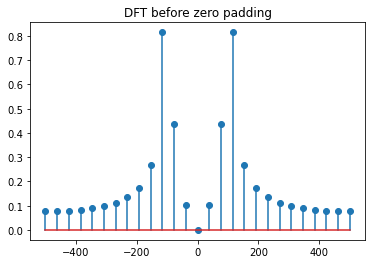

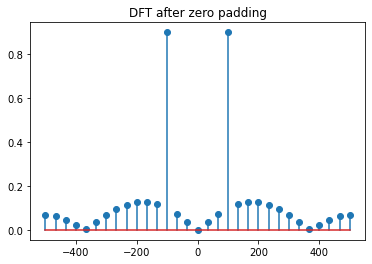

In [101]:
# Define the sampling rate and the signal
fs = 1000 
f = 100 
n_samples = 25 
end_time = n_samples/fs
t = np.arange(0,end_time+1/(2*fs),1/fs)
x = np.cos(2*np.pi*f*t)

# Find DFT without zero padding and plot the result
X = dft(x,len(x))
f1,mX1 = dft_map(X,fs,True)
fig14 = plt.figure(14)
plt.stem(f1,2*abs(mX1))
plt.title('DFT before zero padding')

# Find DFT after zero padding and plot the result
mX,freqz = optimalZeropad(x, fs, f)
fig15 = plt.figure(15)
plt.stem(freqz,2*abs(mX))
plt.title('DFT after zero padding')

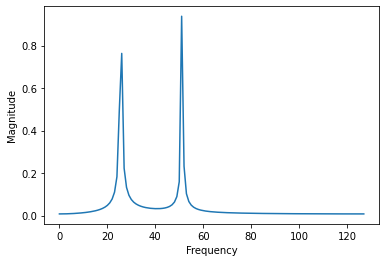

In [102]:
N = 256 # Number of points
Delta = (2*np.pi)/N # write down the expression for Delta
n =  np.arange(0, 256)# obtain the discrete time vector

omega = np.pi/5 # define the main frequency 

# construct a signal that is composed of two cosine waves that are 
# well more than Delta apart in the frequency domain
x = np.cos(omega*n) + np.cos( (2*omega)*n)

# find the DFT and plot the first half of the magnitude spectrum
fig16 = plt.figure(16)
plt.plot(2*abs(dft(x,N)[:N//2]))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

255


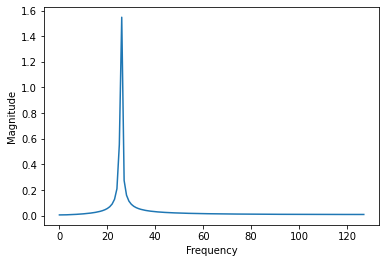

In [103]:
# construct a signal that is composed of two cosine waves that are 
# less than Delta apart in the frequency domain
x = np.cos(omega*n) + np.cos((1+Delta/2)*omega*n)
oldN1 = len(x)
print(max(n))
# find the DFT and plot the first half of the magnitude spectrum
fig17 = plt.figure(17)
plt.plot(2*abs(dft(x,N)[:N//2]))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

Text(0, 0.5, 'Magnitude')

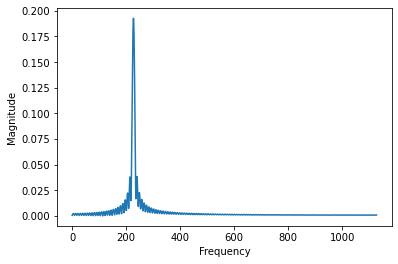

In [104]:
# create a zero padded version of the signal that has cosines less 
# than Delta apart

xzp = np.concatenate((x, np.zeros(2000)))

N1 = len(xzp)

# find the DFT and plot the first half of the magnitude spectrum
plt.plot(2*abs(dft(xzp,N1)[:N1//2]))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

## Discussion

#### Mention any ONE of the adverse effects of spectral leakage.

Due to spectral leakage we can get a DFT spectrum that isn't true to the actual signal. This means that even if the input was a sinusoid of 25Hz, the output spectrum wouldn't read this way if the DFT length isn't a multiple of the the length of the period of the sinusoid. 

#### Why does zero padding not increase frequency resolution and separate out the peaks as seen in Section 4.2.2?

The reason that zero padding doesn't increase the frequency resolution is because we are still plotting against the length of the zero padded signal in terms of frequencies. You can see that the x axis of the frequency graph for the new signal goes up to frequency 1000, whereas the x axis for the frequency graph of the previous cell went only up to 120. So we haven't normalized the frequency vector and therefore haven't increased resolution. 

#### How would you modify the code to show that frequency resolution does indeed decrease with signal length? (Hint: try taking the DFT of only a part of the signal and see how you can fail to resolve the two sinusoids that are more than delta apart. )

To show that frequency resolution decreases as the length of the signal decreases you can lower the portion of a signal whose frequency response is known. After applying the DFT to only a shorter part of the signal it can be seen that the width of the spikes in frequency increase. Below is a screenshot of the frequency response for the signal where the frequencies are more than delta apart when the DFT is the full length of the signal:
<img src="https://drive.google.com/uc?export=view&id=1GV_BeXE3UKeQNHtejT2h7qPVX2h6D414" style="width: 500px; max-width: 100%; height: auto"  />

Whereas when only 30 points of the signal are sampled we begin to see that it is becoming much closer to indistinguishable between the two peaks in frequency:

<img src="https://drive.google.com/uc?export=view&id=1WyXxZ9qNgG3phzmRmVEcYev-TItVqEK8" style="width: 500px; max-width: 100%; height: auto"  />